epoch 20, x1 -0.010599, x2 0.000000


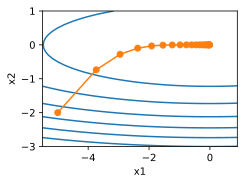

In [7]:
%matplotlib inline
import d2lzh as d2l
import math
from mxnet import nd

def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

In [3]:

features, labels = d2l.get_data_ch7()

def init_rmsprop_states():
    s_w = nd.zeros((features.shape[1], 1))
    s_b = nd.zeros(1)
    return (s_w, s_b)

def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6
    for p, s in zip(params, states):
        s[:] = gamma * s + (1 - gamma) * p.grad.square()
        p[:] -= hyperparams['lr'] * p.grad / (s + eps).sqrt()

loss: 0.243399, 0.185995 sec per epoch


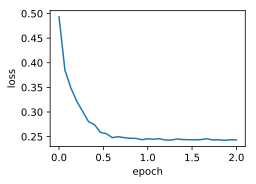

In [9]:
d2l.train_ch7(rmsprop, init_rmsprop_states(), {'lr': 0.01, 'gamma': 0.9},
              features, labels)

loss: 0.244754, 0.122910 sec per epoch


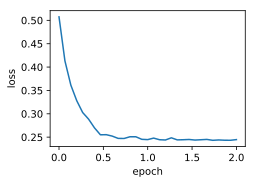

In [10]:
# 简洁实现版本
d2l.train_gluon_ch7('rmsprop', {'learning_rate': 0.01, 'gamma1': 0.9},
                    features, labels)

loss: 0.243111, 0.120479 sec per epoch


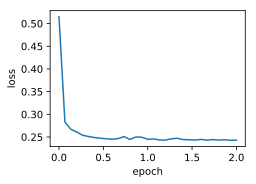

In [42]:
d2l.train_gluon_ch7('rmsprop', {'learning_rate': 0.01, 'gamma1': 0.99},
                    features, labels)

loss: 0.245755, 0.141872 sec per epoch


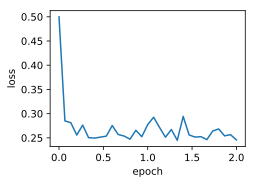

In [44]:
d2l.train_gluon_ch7('rmsprop', {'learning_rate': 0.05, 'gamma1': 0.9},
                    features, labels)

loss: 0.284981, 0.121976 sec per epoch


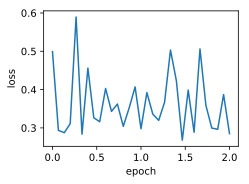